In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
import numpy as np
from sklearn.datasets import fetch_openml


In [3]:

data = pd.read_csv('C:/Users/lisia/Downloads/agaricus-lepiota.data', header=None)

mushroom = fetch_openml(name='mushroom', version=1)
names = pd.DataFrame(mushroom.data, columns=mushroom.feature_names).columns

data = data[~data.isin(['?']).any(axis=1)]

two_dimensional_array = data.values.tolist()

y = [row[0] for row in two_dimensional_array]
X = [row[1:] for row in two_dimensional_array]

for x_val, y_val in zip(X, y):
    print(x_val, y_val)

print(names)



['x', 's', 'n', 't', 'p', 'f', 'c', 'n', 'k', 'e', 'e', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'k', 's', 'u'] p
['x', 's', 'y', 't', 'a', 'f', 'c', 'b', 'k', 'e', 'c', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'n', 'n', 'g'] e
['b', 's', 'w', 't', 'l', 'f', 'c', 'b', 'n', 'e', 'c', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'n', 'n', 'm'] e
['x', 'y', 'w', 't', 'p', 'f', 'c', 'n', 'n', 'e', 'e', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'k', 's', 'u'] p
['x', 's', 'g', 'f', 'n', 'f', 'w', 'b', 'k', 't', 'e', 's', 's', 'w', 'w', 'p', 'w', 'o', 'e', 'n', 'a', 'g'] e
['x', 'y', 'y', 't', 'a', 'f', 'c', 'b', 'n', 'e', 'c', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'k', 'n', 'g'] e
['b', 's', 'w', 't', 'a', 'f', 'c', 'b', 'g', 'e', 'c', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'k', 'n', 'm'] e
['b', 'y', 'w', 't', 'l', 'f', 'c', 'b', 'n', 'e', 'c', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'n', 's', 'm'] e
['x', 'y', 'w', 't', 'p', 'f', 'c', 'n', 'p', 'e', 'e', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 

In [4]:
import numpy as np

def entropy(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    return -np.sum(probabilities * np.log2(probabilities))

def gain_ratio(features, target):
    total_entropy = entropy(target)
    split_info = entropy(features)
    unique_values, counts = np.unique(features, return_counts=True)
    weighted_entropy = np.sum([(count / len(features)) * entropy(target[features == value]) for value, count in zip(unique_values, counts)])
    information_gain = total_entropy - weighted_entropy
    gain_ratio = information_gain / (split_info if split_info != 0 else 1e-10) # to avoid division by zero
    return gain_ratio

X_array = np.array(X)
y_array = np.array(y)

gain_ratios = []

for feature in X_array.T:  # Итерируемся по каждому столбцу (признаку)
    gain_ratios.append(gain_ratio(feature, y_array))


sorted_data = sorted(zip(names, gain_ratios), key=lambda x: x[1], reverse=True)

for feature_name, gain_ratio_value in sorted_data:
    print(f"{feature_name}: {gain_ratio_value}")

odor: 0.43547303887143163
stalk-surface-above-ring: 0.3404271089752261
ring-type: 0.3383066465059272
spore-print-color: 0.31536065218020426
stalk-surface-below-ring: 0.28433254913959377
stalk-shape: 0.27511935870288545
stalk-color-above-ring: 0.16251124775059986
stalk-color-below-ring: 0.1461896381716539
gill-attachment: 0.14302901664370626
bruises%3F: 0.14172551860073812
veil-color: 0.12747574898391514
gill-spacing: 0.08542450766677998
cap-color: 0.07879934350522408
gill-color: 0.07728533192370693
stalk-root: 0.07230324864596835
gill-size: 0.059743351643941706
ring-number: 0.05912882732670716
population: 0.05381483313871901
habitat: 0.052081377757015754
cap-shape: 0.012959187840271837
cap-surface: 0.0029493639633922843
veil-type: 0.0


In [5]:
index1 = names.get_loc('odor')
index2 = names.get_loc('stalk-surface-above-ring')
index3 = names.get_loc('ring-type')
index4 = names.get_loc('spore-print-color')

print("Indexes of leading features:", index1, index2, index3, index4)

Indexes of leading features: 4 11 18 19


In [6]:
X_array_selected = X_array[:, [index1, index2, index3, index4]]

for x_val, y_val in zip(X_array_selected, y_array):
    print(x_val, y_val)


['p' 's' 'p' 'k'] p
['a' 's' 'p' 'n'] e
['l' 's' 'p' 'n'] e
['p' 's' 'p' 'k'] p
['n' 's' 'e' 'n'] e
['a' 's' 'p' 'k'] e
['a' 's' 'p' 'k'] e
['l' 's' 'p' 'n'] e
['p' 's' 'p' 'k'] p
['a' 's' 'p' 'k'] e
['l' 's' 'p' 'n'] e
['a' 's' 'p' 'k'] e
['a' 's' 'p' 'n'] e
['p' 's' 'p' 'n'] p
['n' 's' 'e' 'k'] e
['n' 's' 'p' 'n'] e
['n' 's' 'e' 'n'] e
['p' 's' 'p' 'k'] p
['p' 's' 'p' 'n'] p
['p' 's' 'p' 'n'] p
['a' 's' 'p' 'n'] e
['p' 's' 'p' 'n'] p
['l' 's' 'p' 'n'] e
['a' 's' 'p' 'n'] e
['l' 's' 'p' 'k'] e
['p' 's' 'p' 'n'] p
['a' 's' 'p' 'n'] e
['l' 's' 'p' 'n'] e
['n' 's' 'p' 'k'] e
['a' 's' 'p' 'n'] e
['l' 's' 'p' 'n'] e
['p' 's' 'p' 'n'] p
['l' 's' 'p' 'n'] e
['l' 's' 'p' 'n'] e
['l' 's' 'p' 'n'] e
['l' 's' 'p' 'n'] e
['n' 's' 'p' 'k'] e
['p' 's' 'p' 'n'] p
['a' 's' 'p' 'n'] e
['l' 's' 'p' 'k'] e
['a' 's' 'p' 'n'] e
['l' 's' 'p' 'k'] e
['n' 's' 'p' 'k'] e
['p' 's' 'p' 'n'] p
['a' 's' 'p' 'k'] e
['a' 's' 'p' 'n'] e
['l' 's' 'p' 'k'] e
['l' 's' 'p' 'n'] e
['l' 's' 'p' 'n'] e
['l' 's' 'p' 'k'] e


In [7]:
X_numeric = [[ord(char)-ord('a') for char in row] for row in X_array_selected]
X_numeric = np.array(X_numeric)
X_numeric = (X_numeric - X_numeric.mean()) / X_numeric.std()

y_numeric = np.zeros((len(y_array), 1), dtype=int)

for i, value in enumerate(y_array):
    if value == 'p':
        y_numeric[i] = [0]
    elif value == 'e':
        y_numeric[i] = [1]

for x_val, y_val in zip(X_numeric, y_numeric):
    print(x_val, y_val)


[ 0.68051215  1.32853149  0.68051215 -0.39952007] [0]
[-2.55958452  1.32853149  0.68051215  0.24849926] [1]
[-0.18351363  1.32853149  0.68051215  0.24849926] [1]
[ 0.68051215  1.32853149  0.68051215 -0.39952007] [0]
[ 0.24849926  1.32853149 -1.69555874  0.24849926] [1]
[-2.55958452  1.32853149  0.68051215 -0.39952007] [1]
[-2.55958452  1.32853149  0.68051215 -0.39952007] [1]
[-0.18351363  1.32853149  0.68051215  0.24849926] [1]
[ 0.68051215  1.32853149  0.68051215 -0.39952007] [0]
[-2.55958452  1.32853149  0.68051215 -0.39952007] [1]
[-0.18351363  1.32853149  0.68051215  0.24849926] [1]
[-2.55958452  1.32853149  0.68051215 -0.39952007] [1]
[-2.55958452  1.32853149  0.68051215  0.24849926] [1]
[0.68051215 1.32853149 0.68051215 0.24849926] [0]
[ 0.24849926  1.32853149 -1.69555874 -0.39952007] [1]
[0.24849926 1.32853149 0.68051215 0.24849926] [1]
[ 0.24849926  1.32853149 -1.69555874  0.24849926] [1]
[ 0.68051215  1.32853149  0.68051215 -0.39952007] [0]
[0.68051215 1.32853149 0.68051215 0.

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return x * (1 - x)


def initialize_weights_and_biases(layer_sizes):
    np.random.seed(1)
    num_layers = len(layer_sizes)
    weights = []
    biases = []
    for i in range(1, num_layers):
        weights.append(np.random.uniform(size=(layer_sizes[i - 1], layer_sizes[i])))
        biases.append(np.random.uniform(size=(1, layer_sizes[i])))
    return weights, biases


def forward_propagation(X, weights, biases):
    num_layers = len(weights) + 1
    layer_outputs = [X]
    for i in range(num_layers - 1):
        layer_input = np.dot(layer_outputs[-1], weights[i]) + biases[i]
        layer_output = sigmoid(layer_input)
        layer_outputs.append(layer_output)
    return layer_outputs


def backward_propagation(X, y, layer_outputs, weights, biases, learning_rate):
    num_layers = len(weights)
    num_samples = X.shape[0]
    output_layer_output = layer_outputs[-1]
    output_error = y - output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)
    for i in range(num_layers - 1, -1, -1):
        if i == num_layers - 1:
            layer_delta = output_delta
        else:
            layer_error = layer_delta.dot(weights[i + 1].T)
            layer_delta = layer_error * sigmoid_derivative(layer_outputs[i + 1])
        weights[i] += layer_outputs[i].T.dot(layer_delta) * learning_rate / num_samples
        biases[i] += np.sum(layer_delta, axis=0, keepdims=True) * learning_rate / num_samples
    return weights, biases


def train_network(X, y, layer_sizes, learning_rate, epochs):
    weights, biases = initialize_weights_and_biases(layer_sizes)
    for epoch in range(epochs):
        layer_outputs = forward_propagation(X, weights, biases)
        weights, biases = backward_propagation(X, y, layer_outputs, weights, biases, learning_rate)
    print("Training complete!")
    return weights, biases


X_train = X_numeric[:4000]
y_train = y_numeric[:4000]

learning_rate = 0.5
epochs = 1000

layer_sizes = [X_train.shape[1], 20, 1]

weights, biases = train_network(X_train, y_train, layer_sizes, learning_rate, epochs)



Training complete!


In [22]:
X_test = X_numeric[4000:]
y_test = y_numeric[4000:]

print(X_test)
print(y_test)

def predict(X, y, weights, biases):
    layer_outputs = forward_propagation(X, weights, biases)
    predictions = []
    for output in layer_outputs[-1]:
        prediction = np.where(output < 0.5, 0, 1)
        predictions.append(prediction)
    print("----")
    print(layer_outputs[-1])
    result = np.column_stack((y, predictions))
    return result

predictions = predict(X_test, y_test, weights, biases)
print("Prediction for new data:")

for pred in predictions:
    print(pred[0], pred [1]);

count = sum(1 for pred in predictions if pred[0] == pred[1])
print("Accuracy:", count/len(y_test))


[[-1.47955229 -0.39952007 -0.18351363 -1.04753941]
 [ 0.24849926  1.32853149  0.68051215 -0.39952007]
 [ 0.24849926  1.32853149  0.68051215 -0.39952007]
 ...
 [ 0.24849926  1.32853149  0.68051215  2.19255727]
 [ 0.03249282 -0.39952007  0.24849926  2.19255727]
 [ 0.03249282 -0.39952007  0.24849926  2.19255727]]
[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
----
[[0.33816571]
 [0.9176062 ]
 [0.9176062 ]
 ...
 [0.98044261]
 [0.97445004]
 [0.97445004]]
Prediction for new data:
0 0
1 1
1 1
0 0
0 0
1 1
0 0
1 1
1 1
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 1
0 0
0 0
0 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 1
0 0
1 1
0 1
0 0
0 0
0 1
0 0
0 0
1 1
0 0
0 0
0 1
0 1
1 1
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
1 1
1 1
0 0
1 1
1 1
0 0
0 1
0 0
0 0
0 0
1 1
1 1
0 1
1 1
0 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 1
1 1
0 0
0 0
0 0


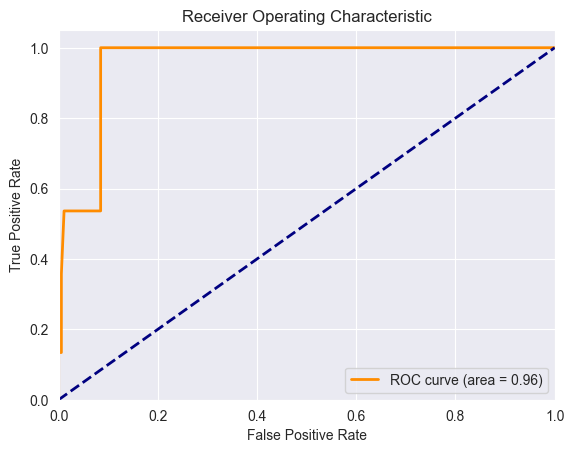

In [23]:
from sklearn.metrics import roc_curve, auc

predictions_prob = forward_propagation(X_test, weights, biases)[-1]


fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)


roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [24]:
actual = predictions[:, 0]
predicted = predictions[:, 1]

TP = np.sum(np.logical_and(actual == 1, predicted == 1))
FP = np.sum(np.logical_and(actual == 0, predicted == 1))
FN = np.sum(np.logical_and(actual == 1, predicted == 0))
TN = np.sum(np.logical_and(actual == 0, predicted == 0))

# print("True Positives:", TP)
# print("False Positives:", FP)
# print("False Negatives:", FN)
# print("True Negatives:", TN)

precision = TP/(FP+TP)
recall = TP/(FN+TP)

print("Precision = ", precision)
print("Recall = ", recall)
print("F1-score = ", 2*recall*precision/(recall+precision))

Precision =  0.3816631130063966
Recall =  1.0
F1-score =  0.5524691358024691
